In [1]:
import os, glob, time, datetime
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torch.nn as nn
from torchvision.utils import save_image

from common.dataset import TrainDataProvider
from common.function import init_embedding
from common.models import Encoder, Decoder, Discriminator, Generator
from common.utils import denorm_image

### GPU Option

In [2]:
GPU = torch.cuda.is_available()
GPU

True

## 110epoch trained model import

In [3]:
FONTS_NUM = 25
EMBEDDING_NUM = 100
BATCH_SIZE = 128
IMG_SIZE = 128
EMBEDDING_DIM = 128

from_model_path = './model_checkpoint/'

In [4]:
En = Encoder().cuda()
De = Decoder().cuda()
D = Discriminator(category_num=FONTS_NUM).cuda()

In [5]:
restore = ['110-0602-01:05-Encoder.pkl', '110-0602-01:05-Decoder.pkl', '110-0602-01:05-Discriminator.pkl']

encoder_path, decoder_path, discriminator_path = restore
prev_epoch = int(encoder_path.split('-')[0])
En.load_state_dict(torch.load(os.path.join(from_model_path, encoder_path)))
De.load_state_dict(torch.load(os.path.join(from_model_path, decoder_path)))
D.load_state_dict(torch.load(os.path.join(from_model_path, discriminator_path)))
print("%d epoch trained model has restored" % prev_epoch)

110 epoch trained model has restored


## Load Data

In [6]:
data_dir = './dataset/'
fixed_dir = './fixed_sample'

In [7]:
data_provider = TrainDataProvider(data_dir)
total_batches = data_provider.compute_total_batch_num(BATCH_SIZE)
print("total batches:", total_batches)

unpickled total 74748 examples
unpickled total 151911 examples
train examples -> 74748, val examples -> 151911
total batches: 584


In [8]:
embeddings = torch.load(os.path.join(fixed_dir, 'EMBEDDINGS.pkl'))
embeddings.shape

torch.Size([100, 1, 1, 128])

## Validation data

In [9]:
font_labels = list(range(25))
fake_targets = {i: [] for i in font_labels}
real_targets = {i: [] for i in font_labels}

In [10]:
val_batch_iter = data_provider.get_val_iter(BATCH_SIZE)

for i, batch in enumerate(val_batch_iter):
    labels, batch_images = batch
    batch_images = batch_images.cuda()
    embedding_ids = labels
    
    # target / source images
    real_target = batch_images[:, 0, :, :].view([BATCH_SIZE, 1, IMG_SIZE, IMG_SIZE])
    real_source = batch_images[:, 1, :, :].view([BATCH_SIZE, 1, IMG_SIZE, IMG_SIZE])
    
    # generate fake image
    fake_target, encoded_source = Generator(real_source, En, De, embeddings, embedding_ids, GPU=GPU)
    
    # save fake images by filtering with fonts
    for label, (real_target, fake) in zip(labels, zip(real_target, fake_target)):
        fake_targets[label].append(fake.cpu().detach().numpy())
        real_targets[label].append(real_target.cpu().detach().numpy())
    
    if i == 20:
        break

In [11]:
count = 0
for key, value in fake_targets.items():
    count += len(fake_targets[key])
    print('[font: %d]' % key, len(fake_targets[key]))
print('all images count: ', count)

[font: 0] 135
[font: 1] 24
[font: 2] 26
[font: 3] 27
[font: 4] 32
[font: 5] 117
[font: 6] 127
[font: 7] 137
[font: 8] 148
[font: 9] 129
[font: 10] 132
[font: 11] 138
[font: 12] 167
[font: 13] 148
[font: 14] 141
[font: 15] 115
[font: 16] 129
[font: 17] 135
[font: 18] 108
[font: 19] 121
[font: 20] 157
[font: 21] 115
[font: 22] 130
[font: 23] 27
[font: 24] 23
all images count:  2688


- 1,  2, 3, 4, 23, 24번 폰트는 2350자만 있는 폰트

## All Fonts show

In [12]:
from common.utils import show_comparison

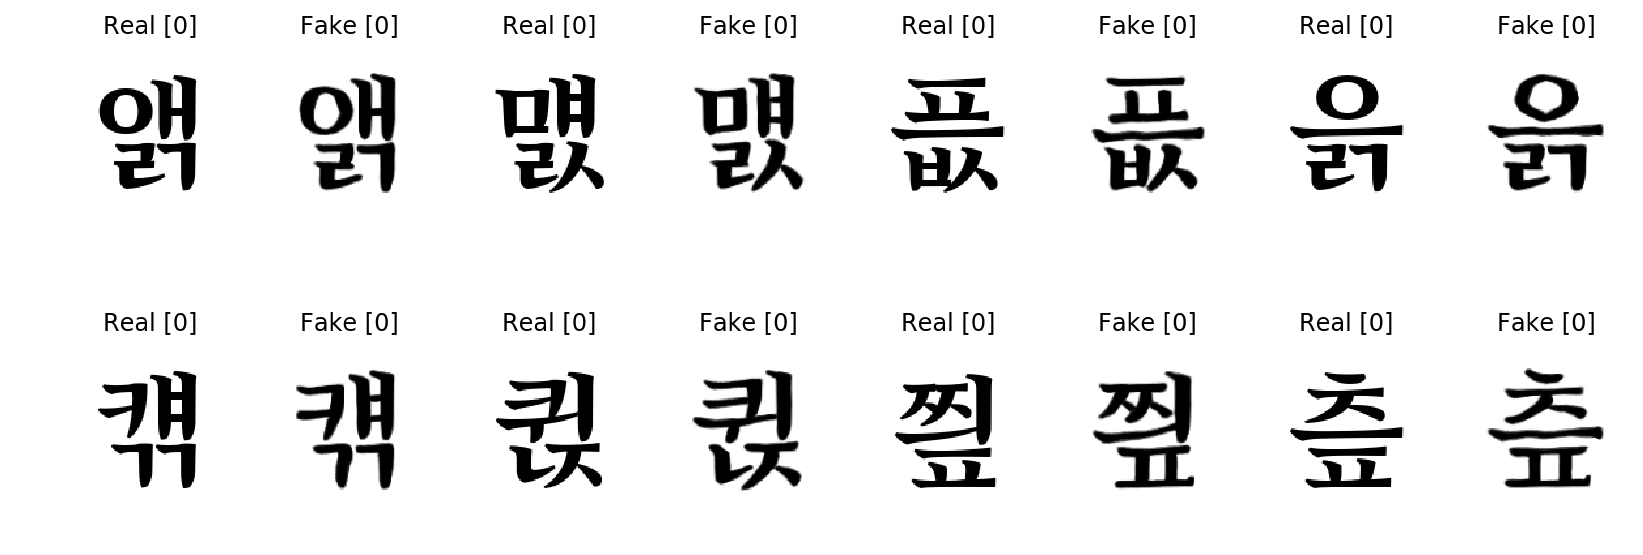

In [13]:
show_comparison(0, real_targets, fake_targets, show_num=8)

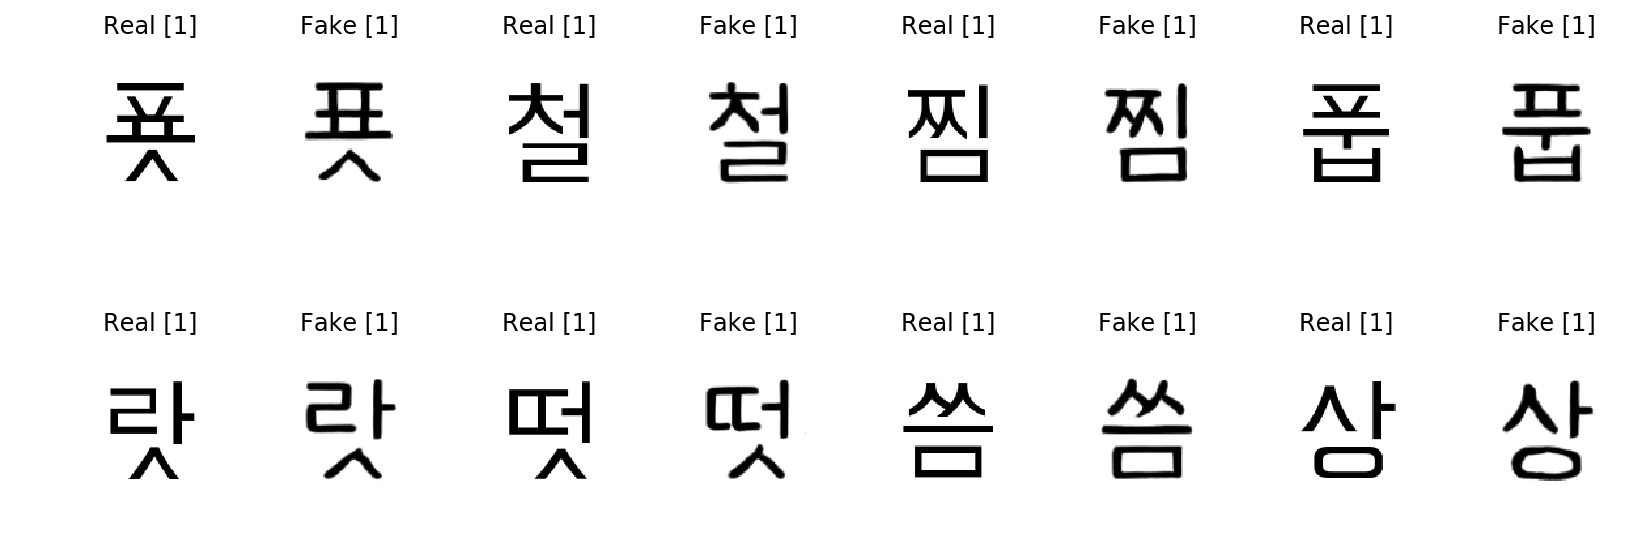

In [14]:
show_comparison(1, real_targets, fake_targets, show_num=8)

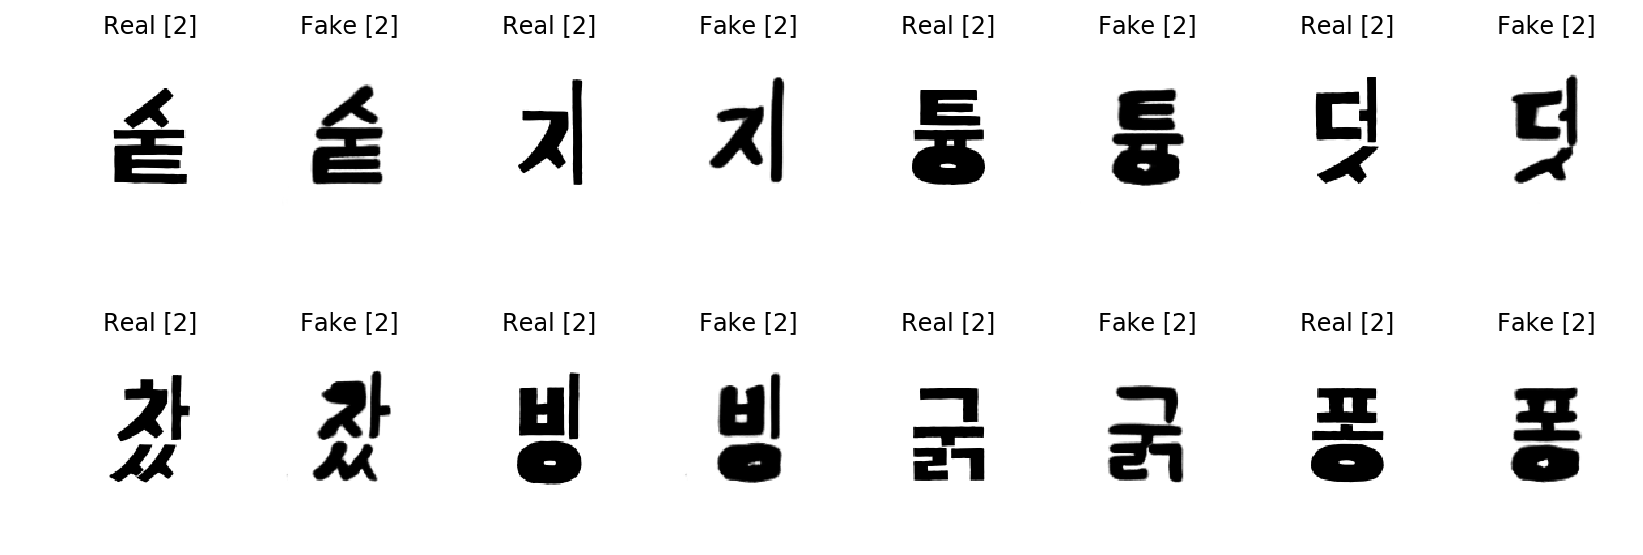

In [15]:
show_comparison(2, real_targets, fake_targets, show_num=8)

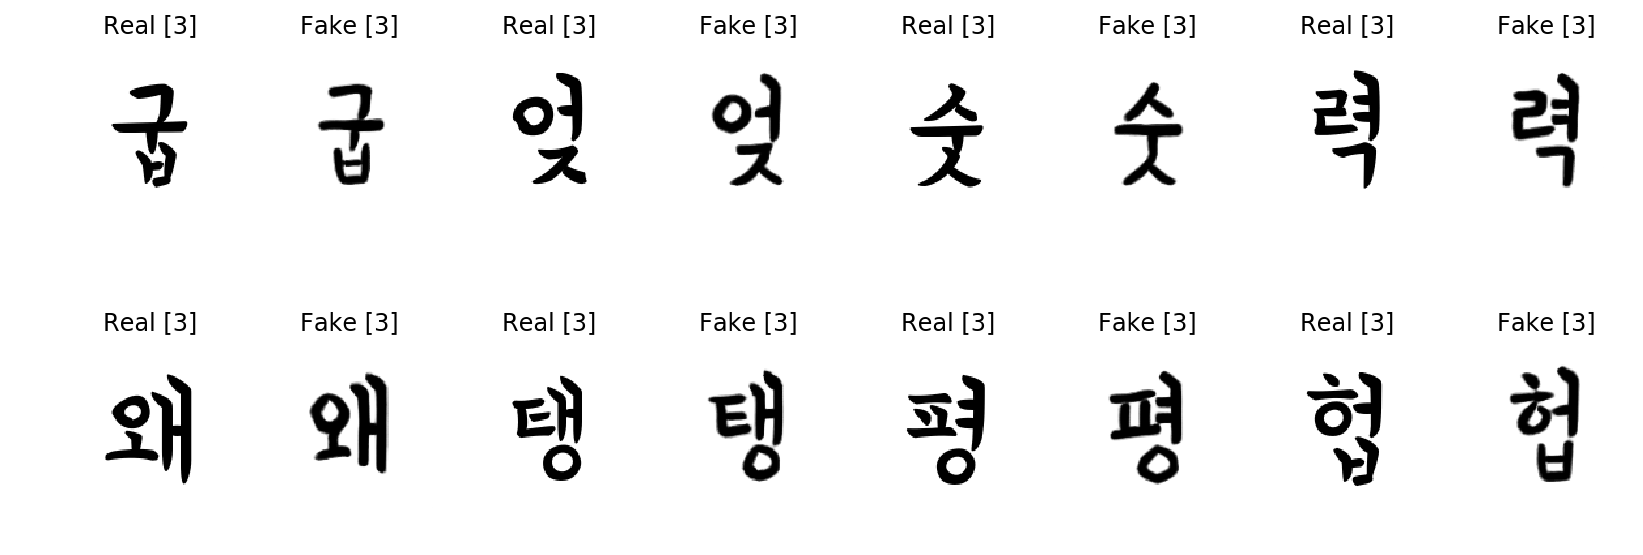

In [16]:
show_comparison(3, real_targets, fake_targets)

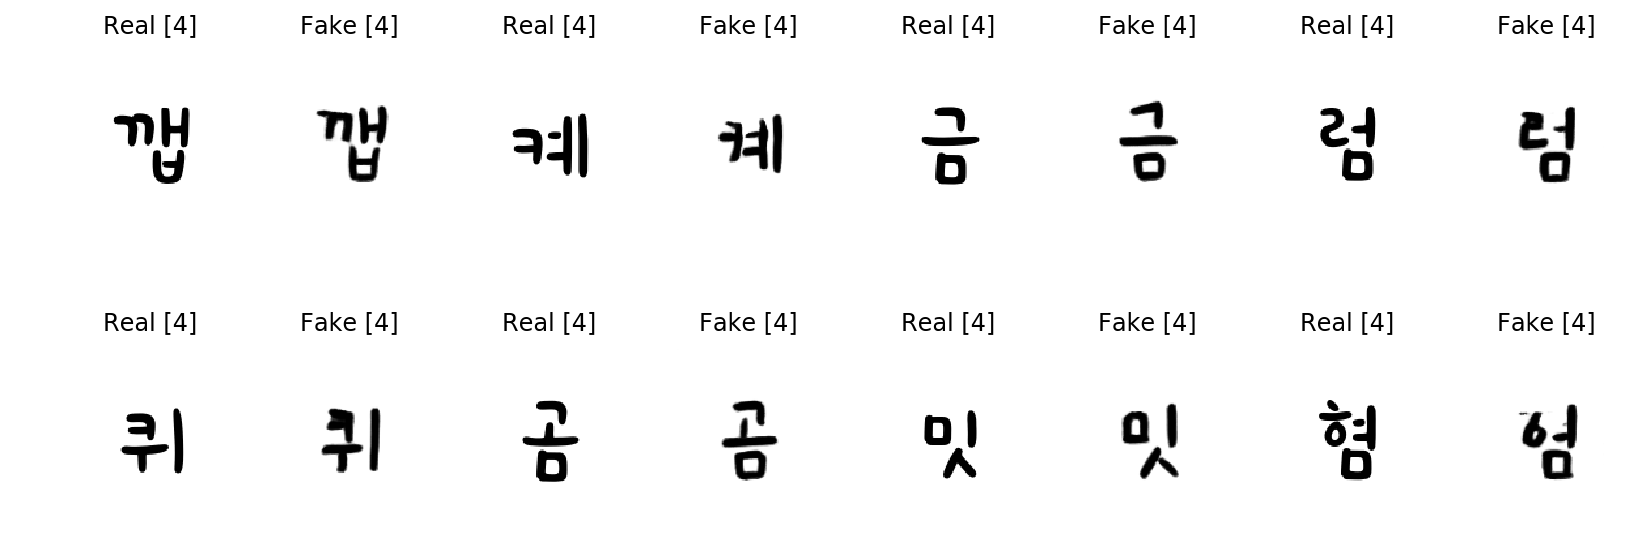

In [17]:
show_comparison(4, real_targets, fake_targets)

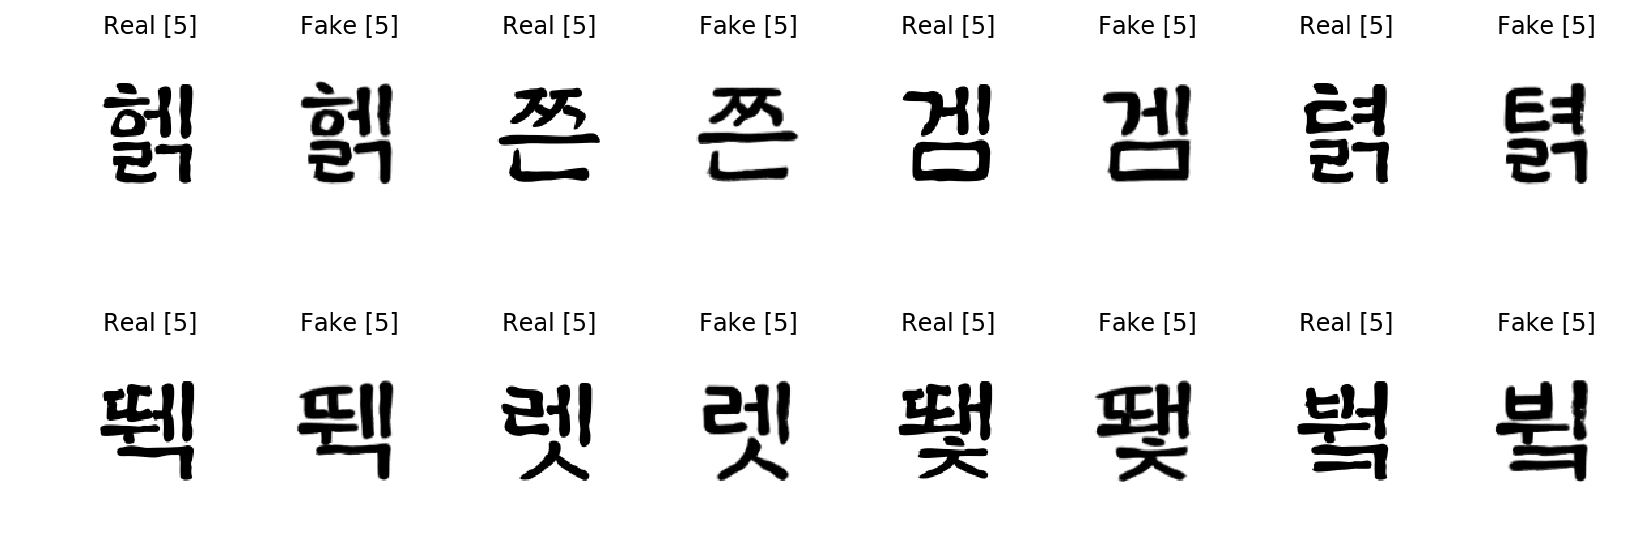

In [18]:
show_comparison(5, real_targets, fake_targets)

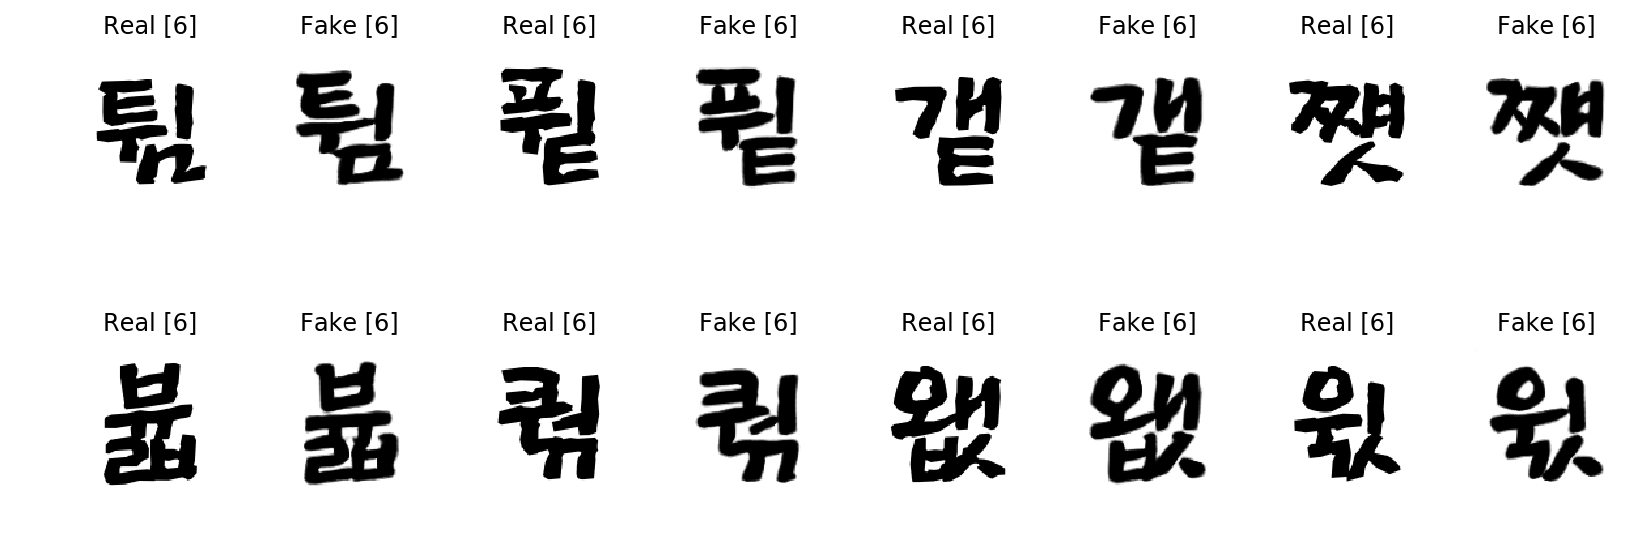

In [19]:
show_comparison(6, real_targets, fake_targets)

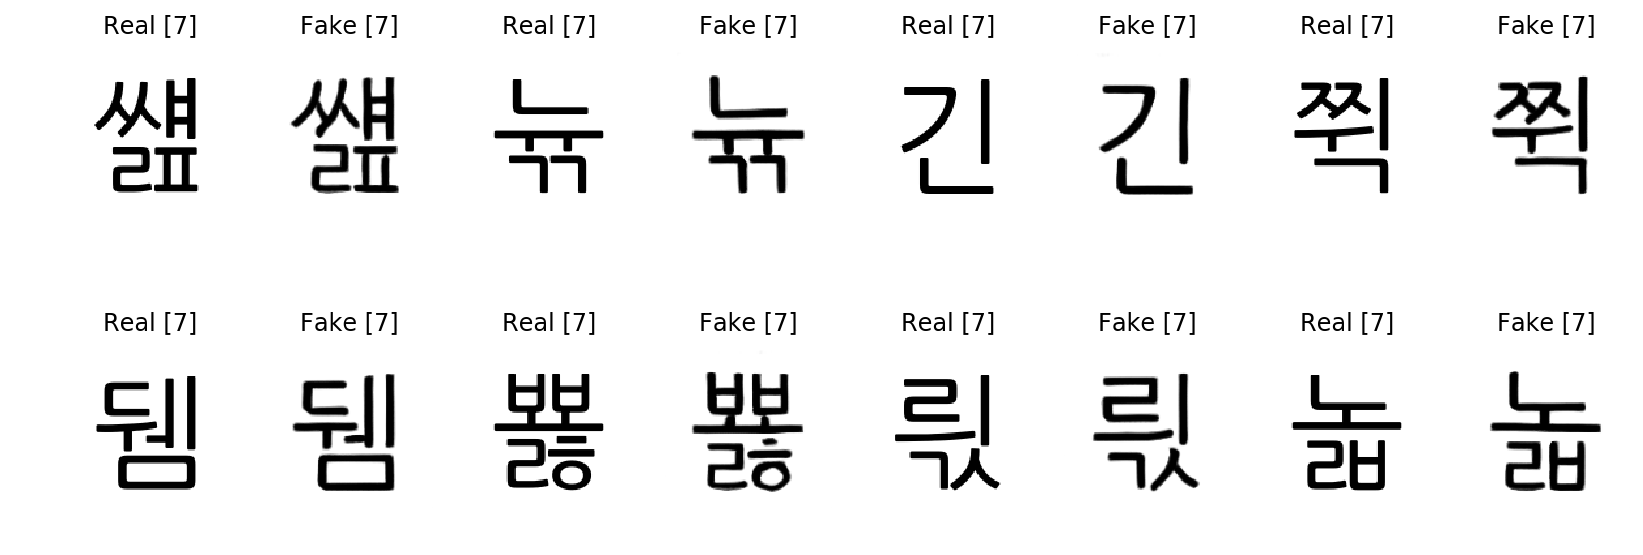

In [20]:
show_comparison(7, real_targets, fake_targets)

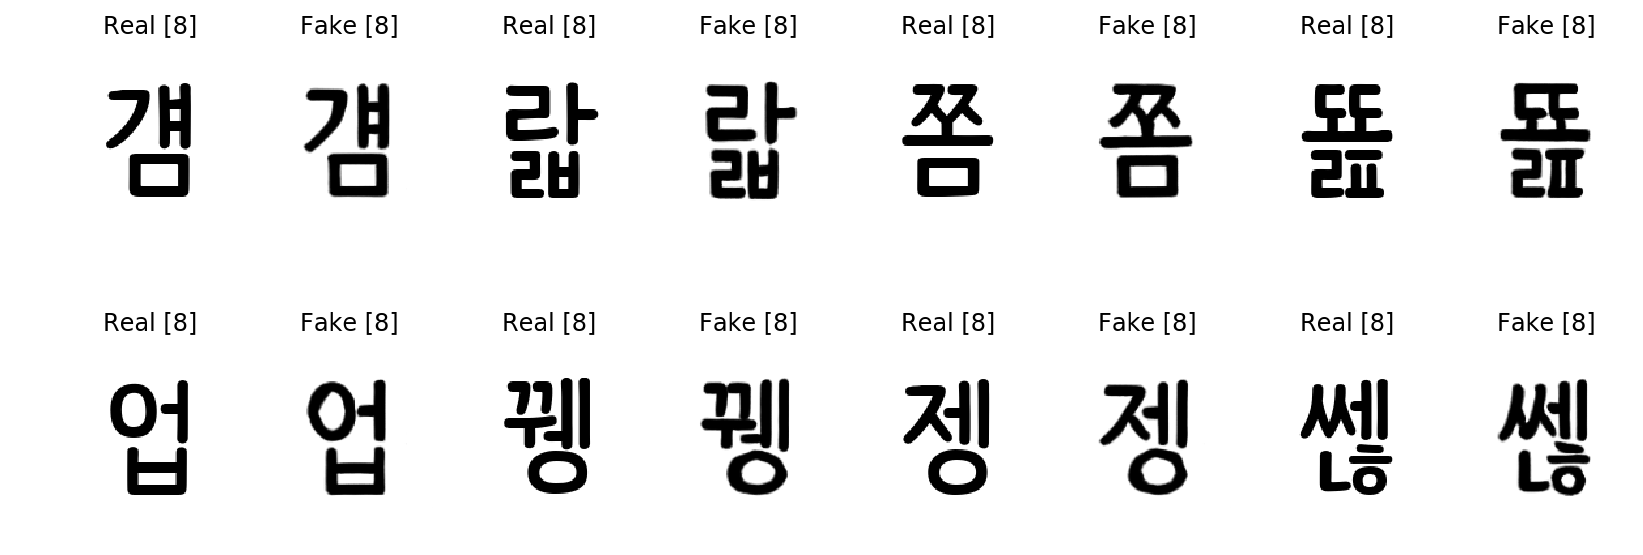

In [21]:
show_comparison(8, real_targets, fake_targets)

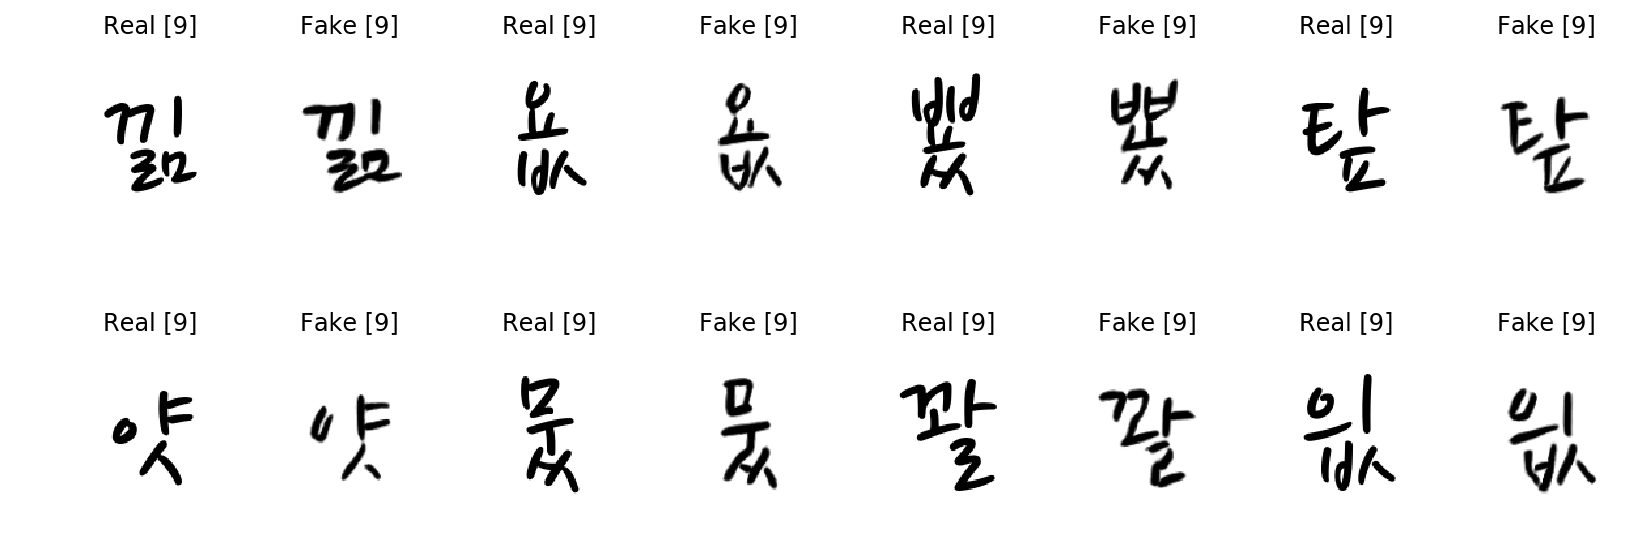

In [22]:
show_comparison(9, real_targets, fake_targets)

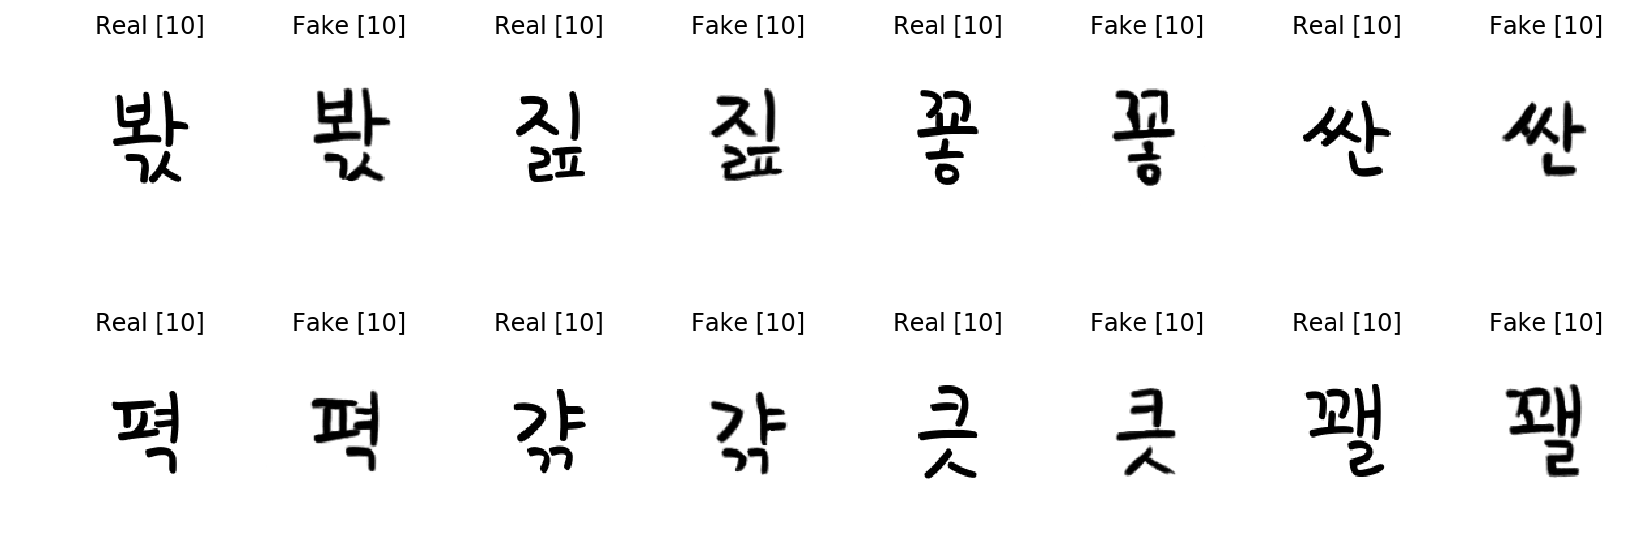

In [23]:
show_comparison(10, real_targets, fake_targets)

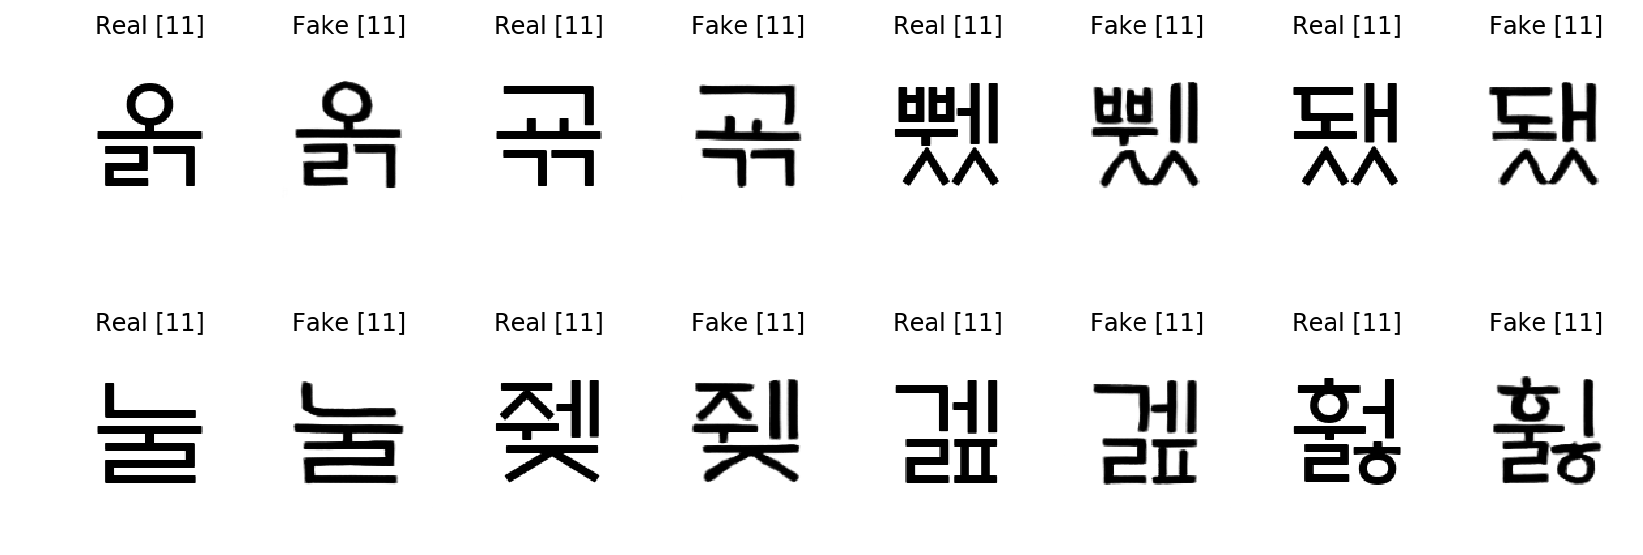

In [24]:
show_comparison(11, real_targets, fake_targets)

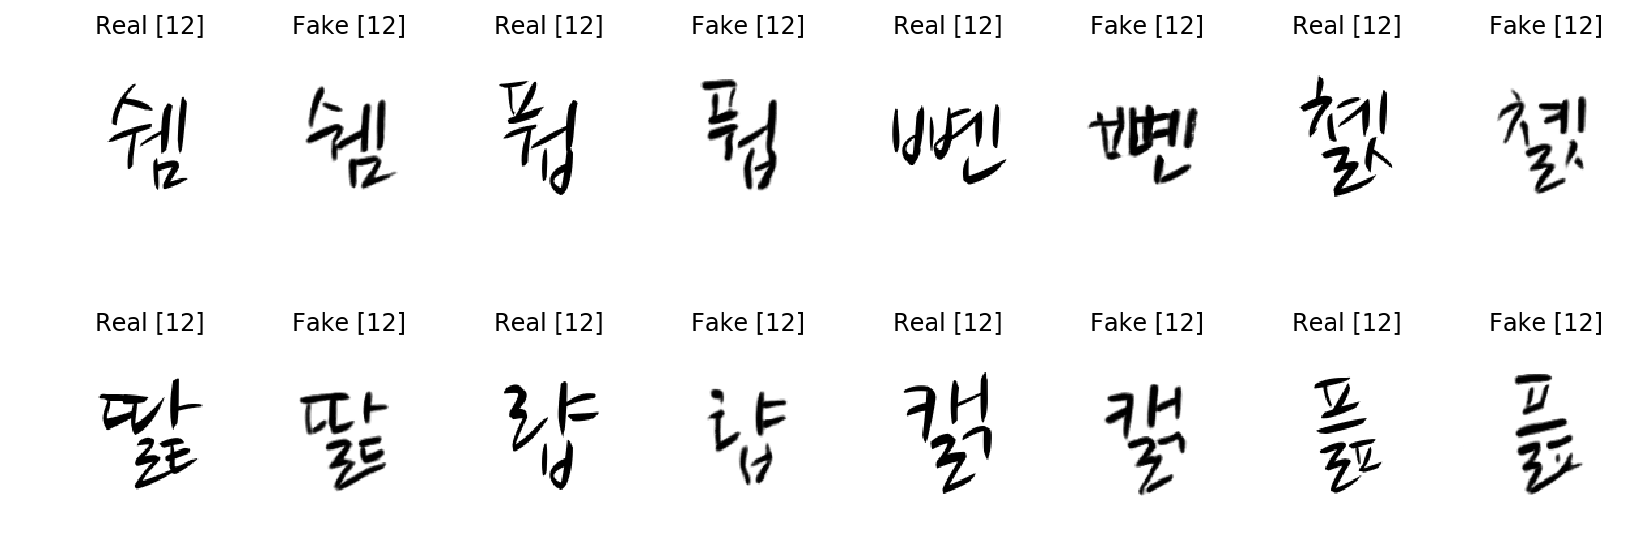

In [25]:
show_comparison(12, real_targets, fake_targets)

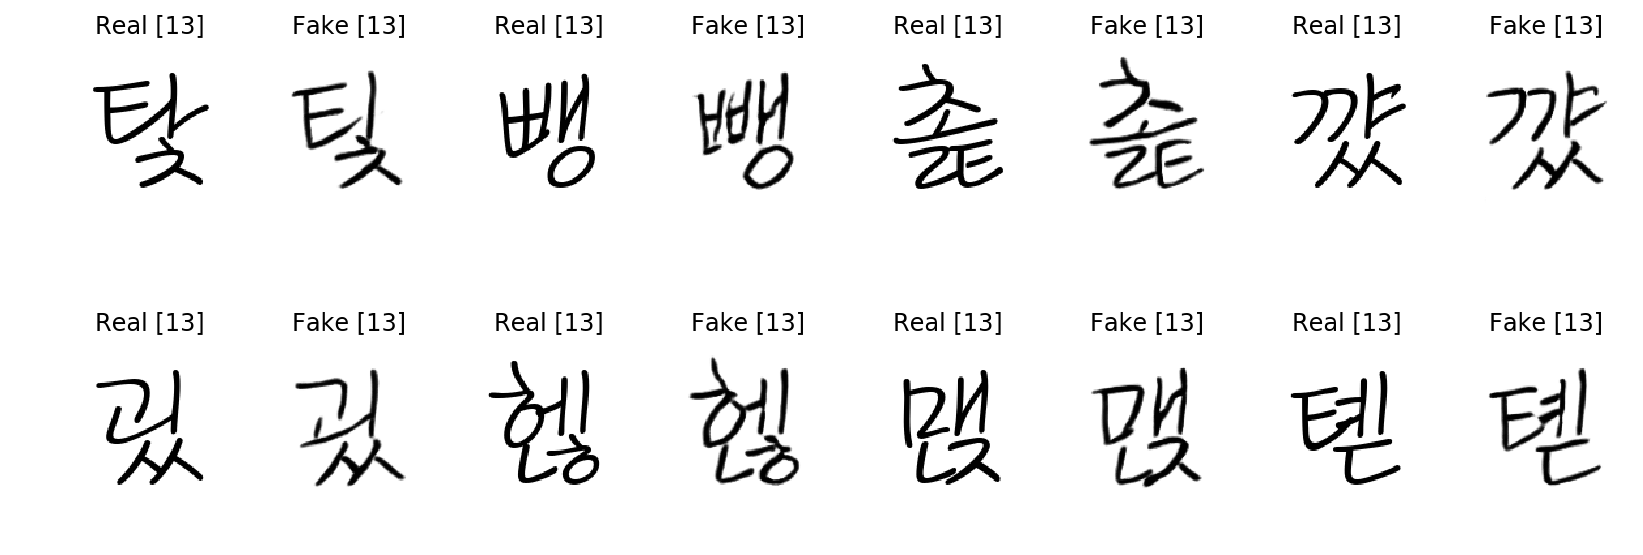

In [26]:
show_comparison(13, real_targets, fake_targets)

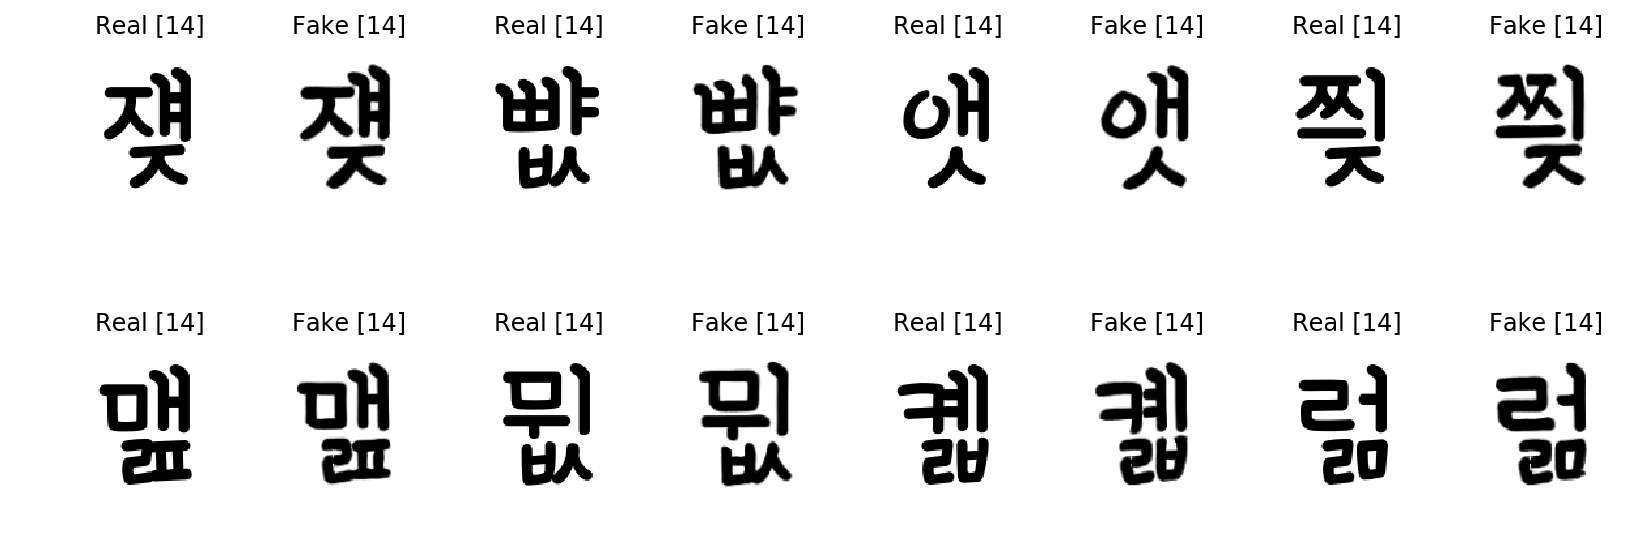

In [27]:
show_comparison(14, real_targets, fake_targets)

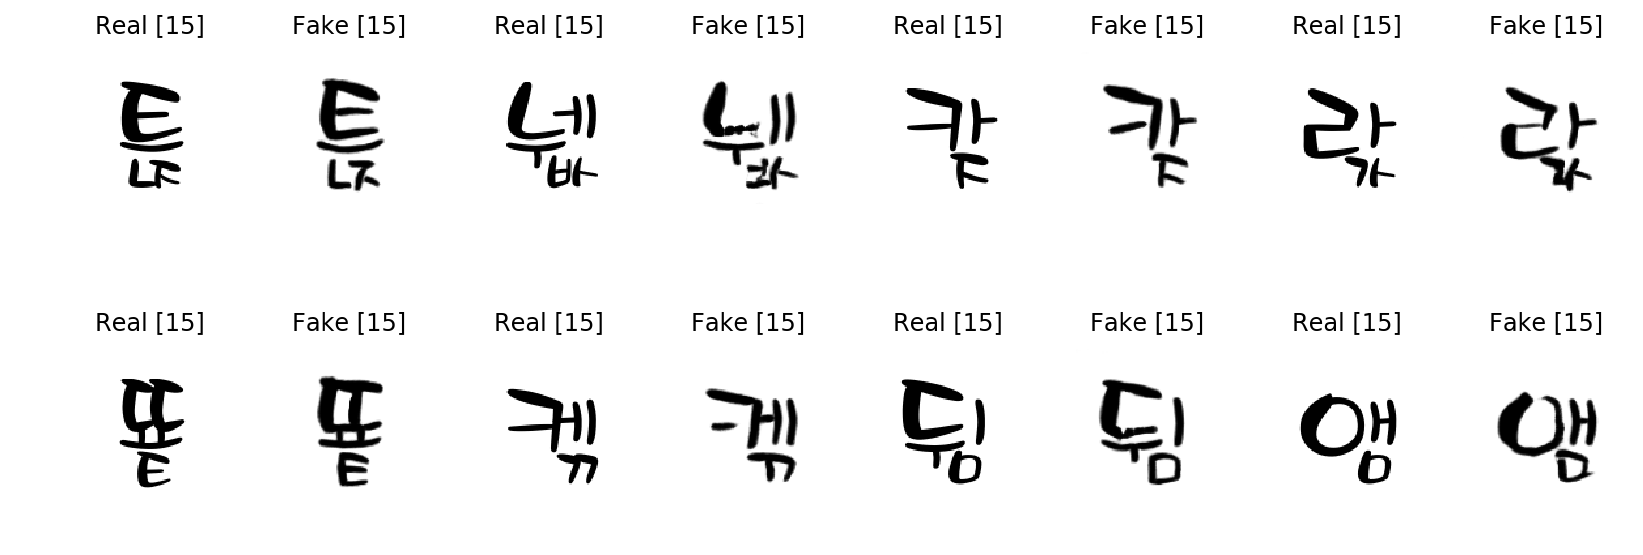

In [28]:
show_comparison(15, real_targets, fake_targets)

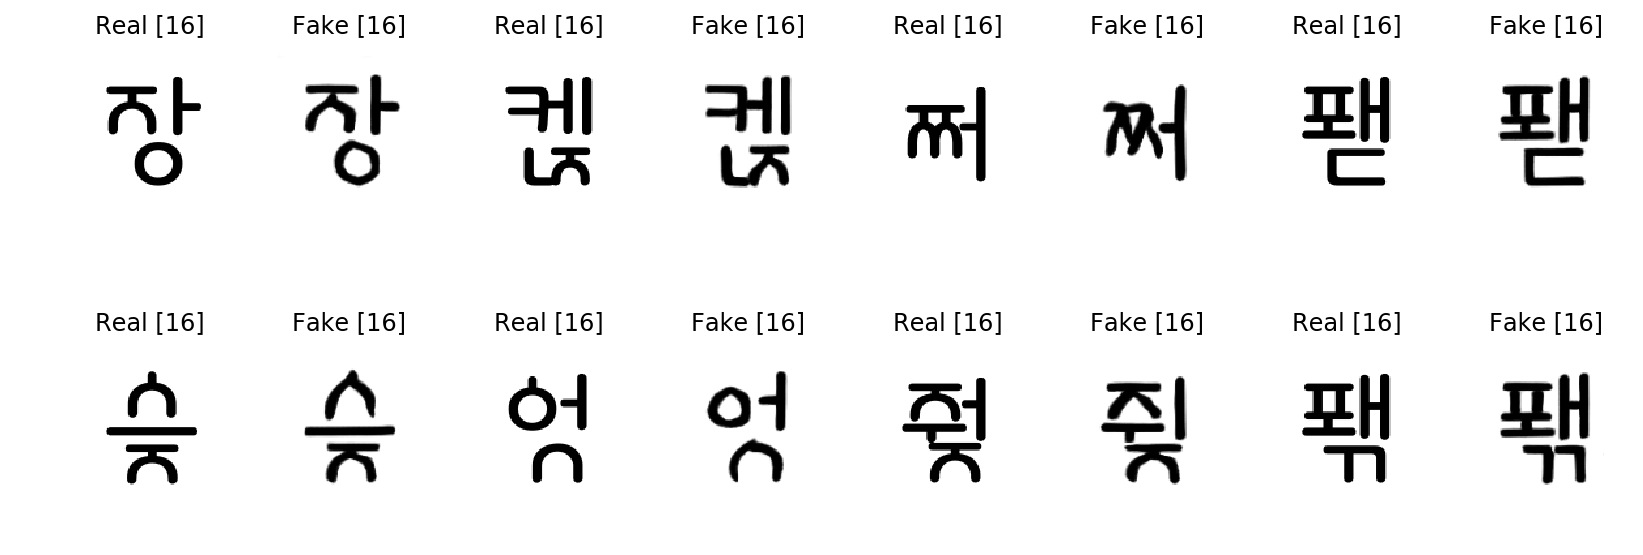

In [29]:
show_comparison(16, real_targets, fake_targets)

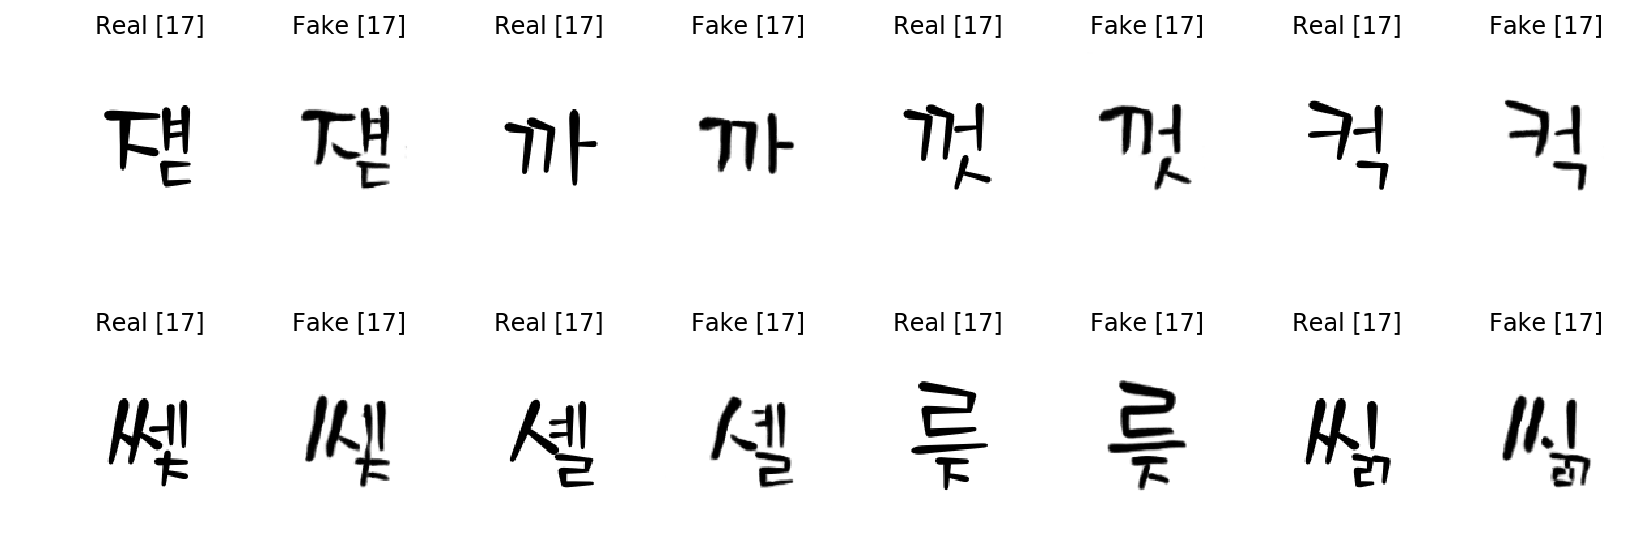

In [30]:
show_comparison(17, real_targets, fake_targets)

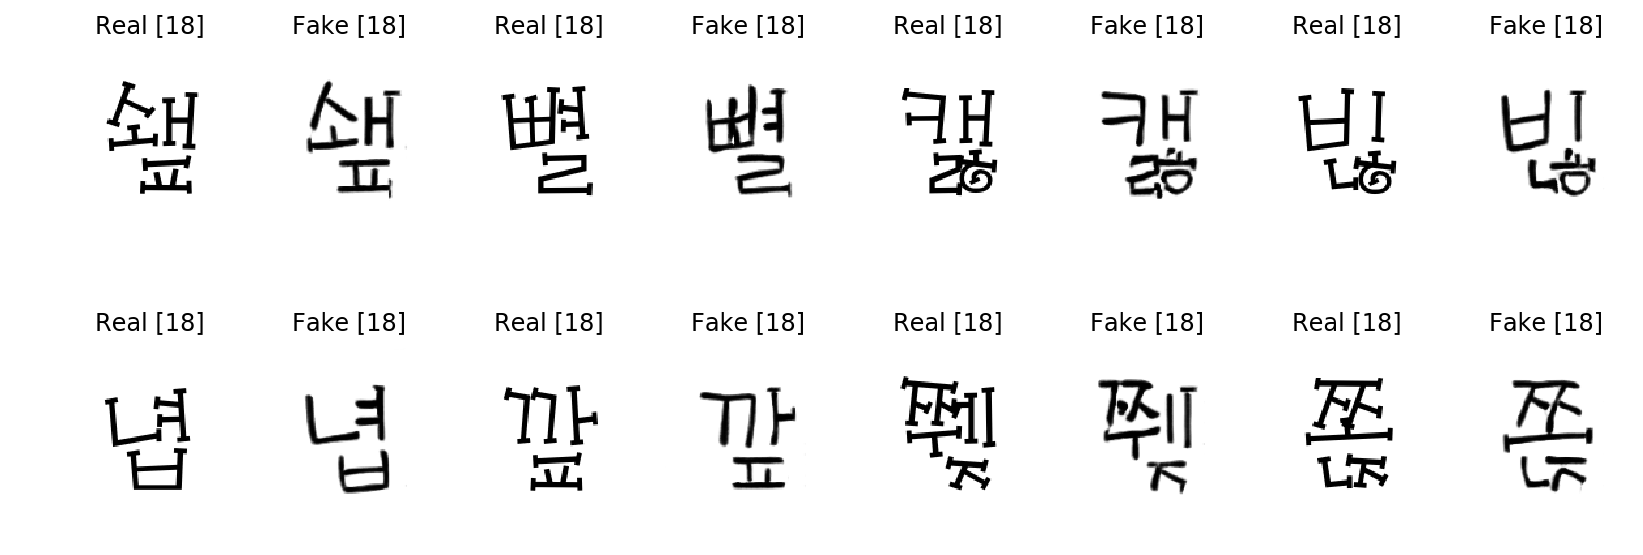

In [31]:
show_comparison(18, real_targets, fake_targets)

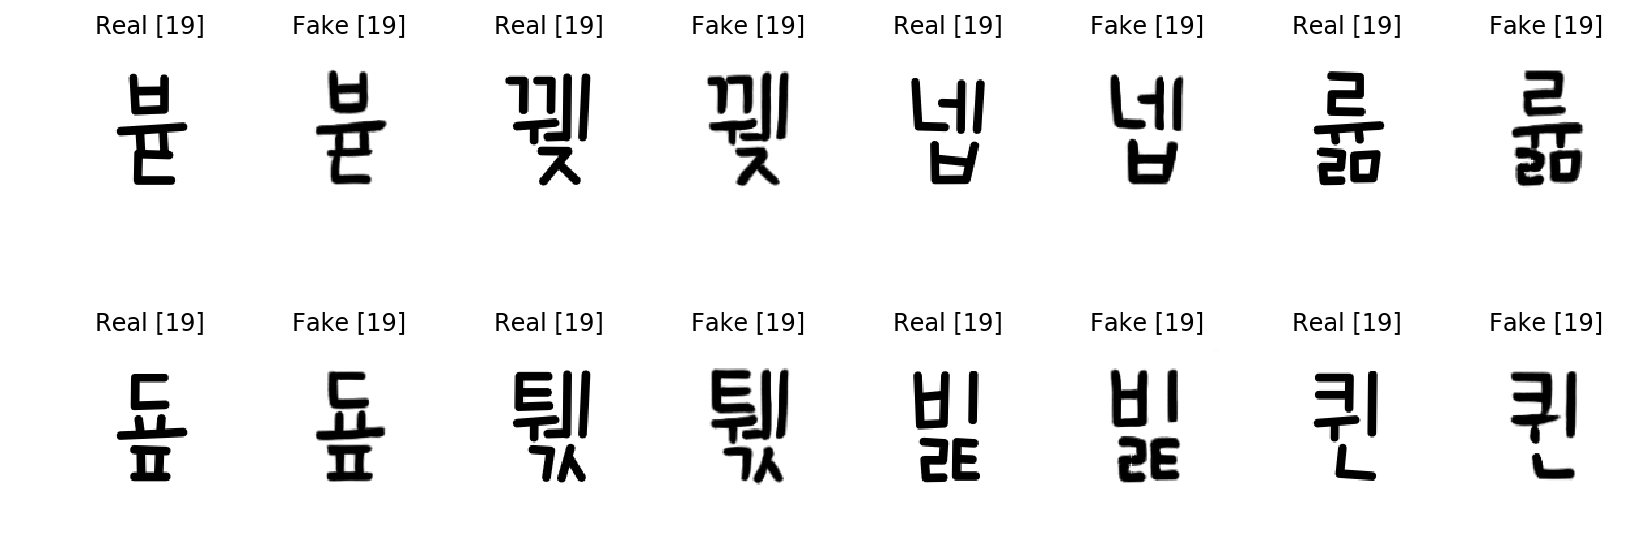

In [32]:
show_comparison(19, real_targets, fake_targets)

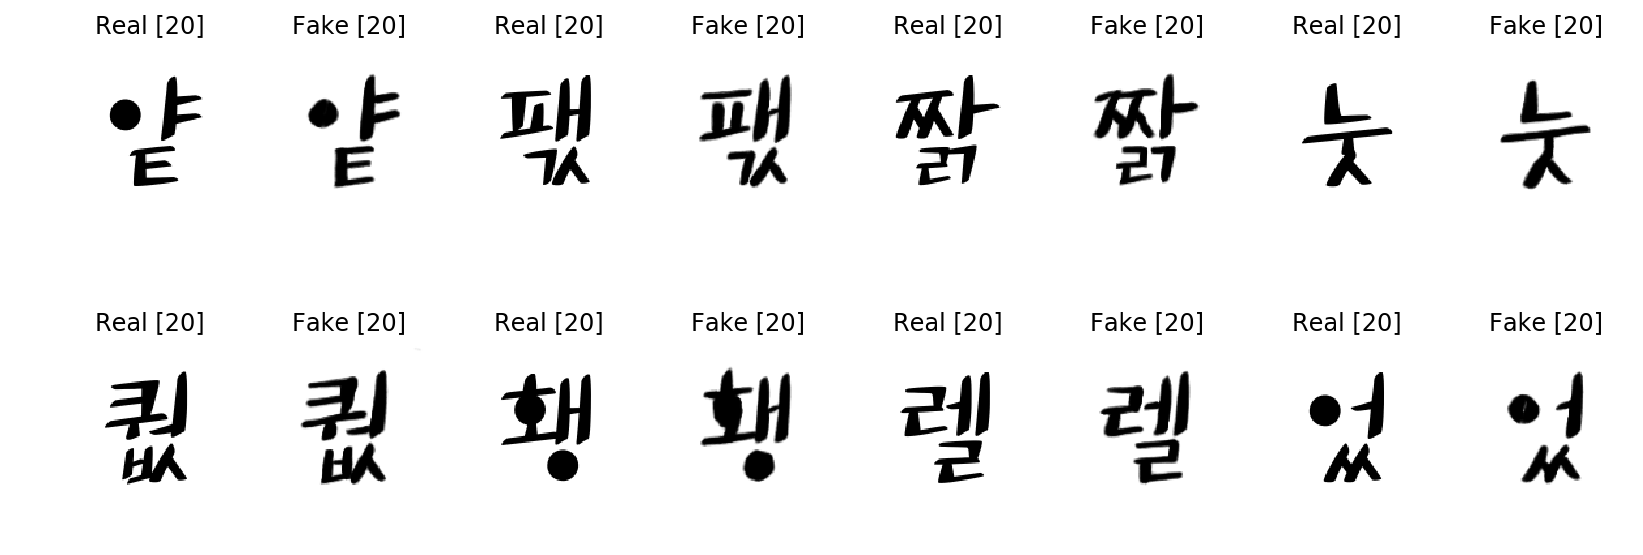

In [33]:
show_comparison(20, real_targets, fake_targets)

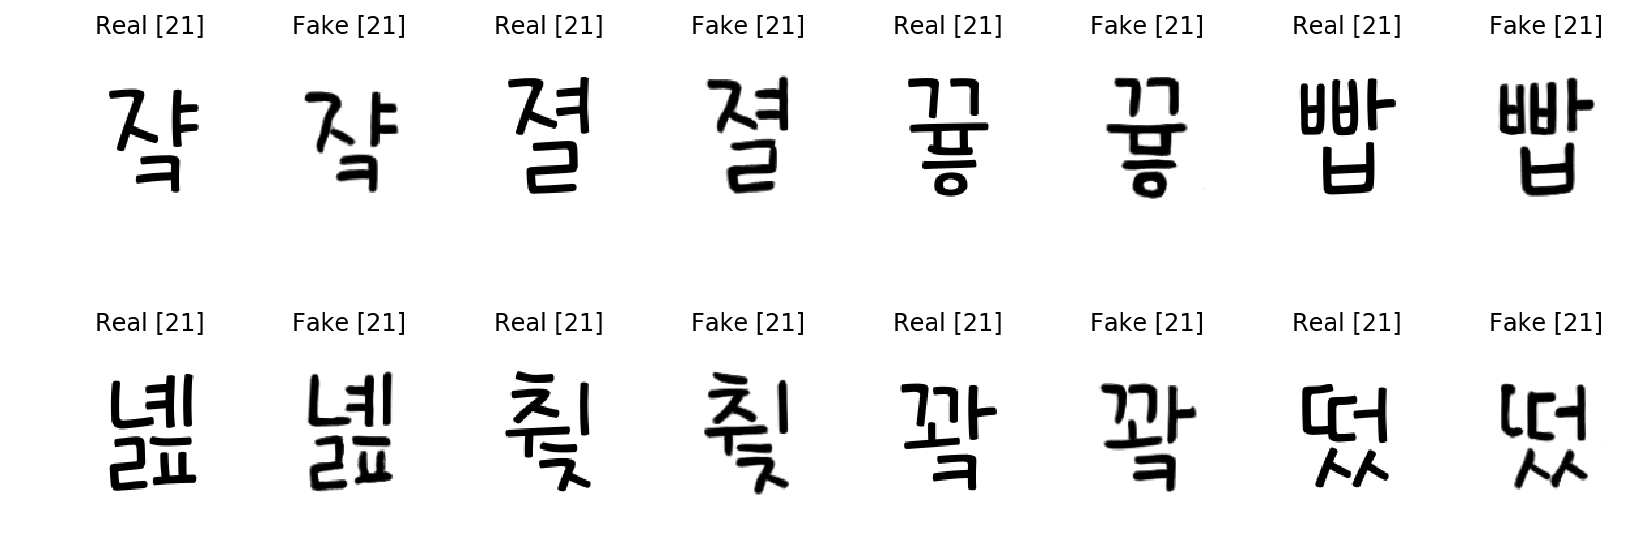

In [34]:
show_comparison(21, real_targets, fake_targets)

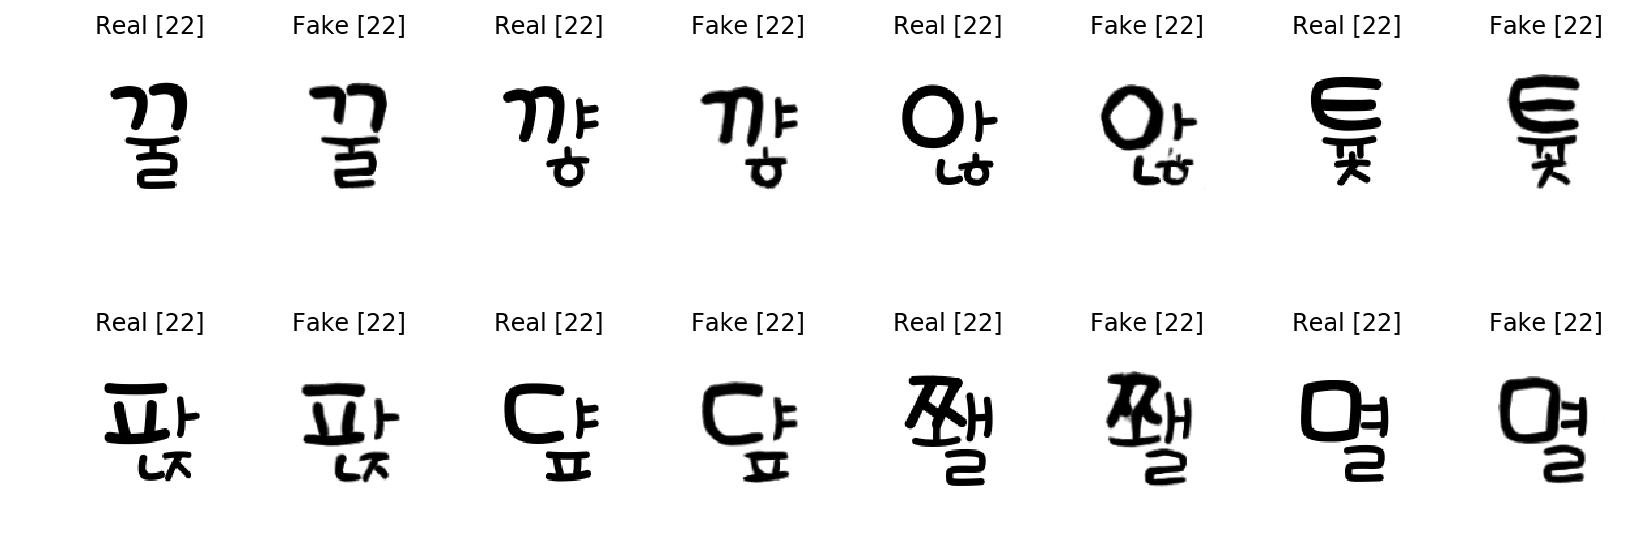

In [35]:
show_comparison(22, real_targets, fake_targets)

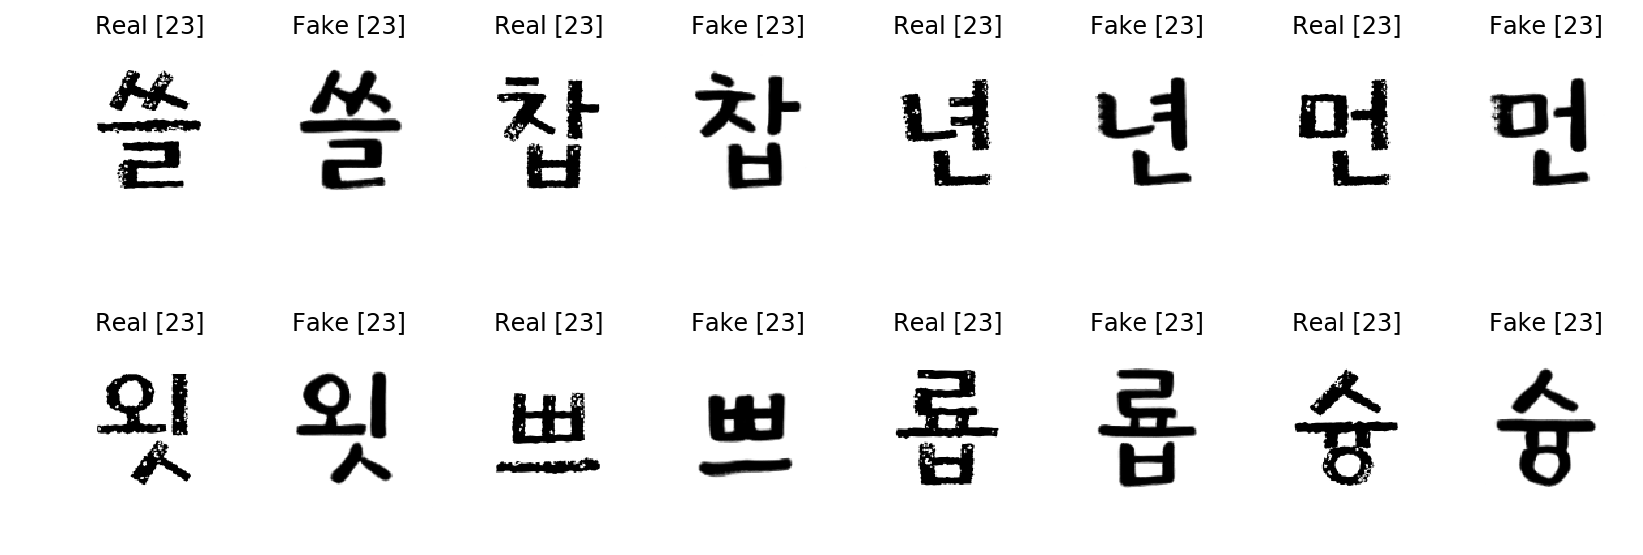

In [36]:
show_comparison(23, real_targets, fake_targets)

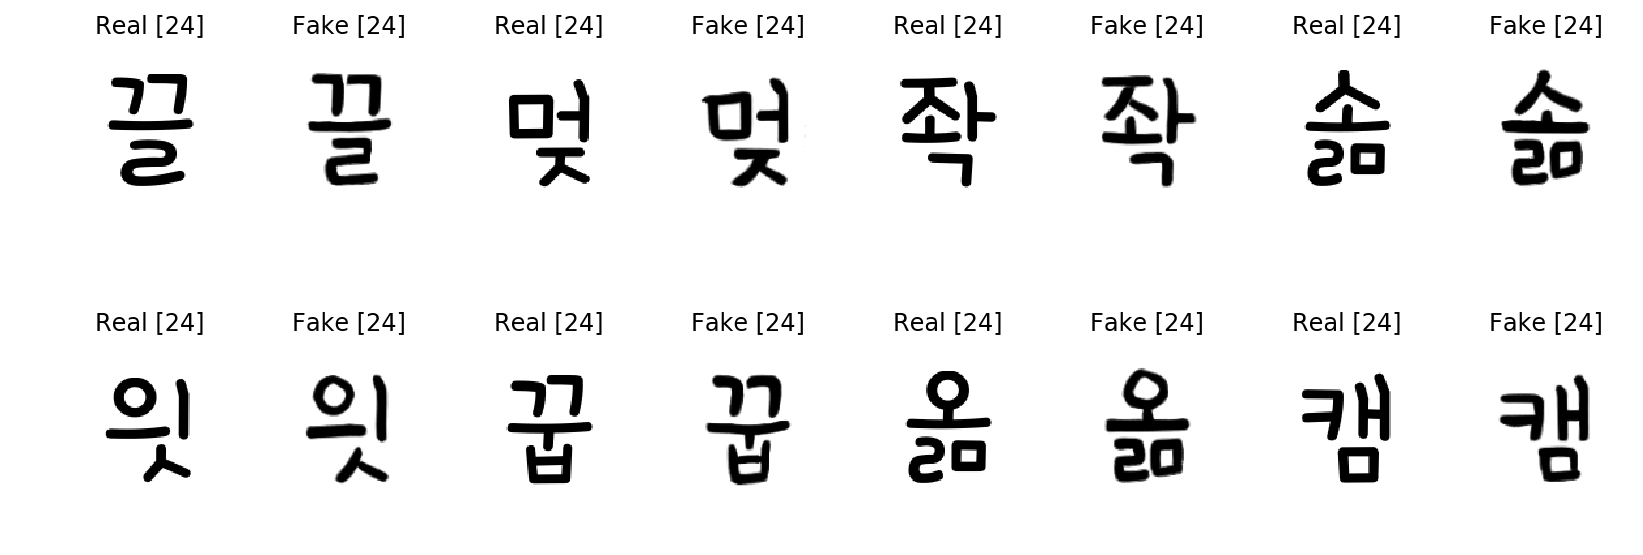

In [37]:
show_comparison(24, real_targets, fake_targets)

- Wowwww


- 가장자리를 sharpen 할 필요 있음